# Importing the libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

# Drop The NaN Rows

In [2]:
df = df.dropna()

# Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             544811 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  544811 non-null  float64
 3   Country                        544811 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.8+ MB


# First 5 Rows 

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


# Convert the date in the data to Datetime

In [5]:
# Convert the dataFrame to a datetime
df['dt'] = pd.to_datetime(df['dt'])
df.loc[:,'month'] = [x.month for x in list(df['dt'])]
df.loc[:,'year'] = [x.year for x in list(df['dt'])]

# United States

In [6]:
#separating US data
USDF = df[df['Country']=='United States']

# Convert to datetime And adding month and year column
USDF.loc[:,'dt'] = pd.to_datetime(USDF['dt'])

USDF.loc[:,'month'] = [x.month for x in list(USDF['dt'])]
USDF.loc[:,'year'] = [x.year for x in list(USDF['dt'])]

# Plot the United States Average Temperature For all the years (1760-2012)

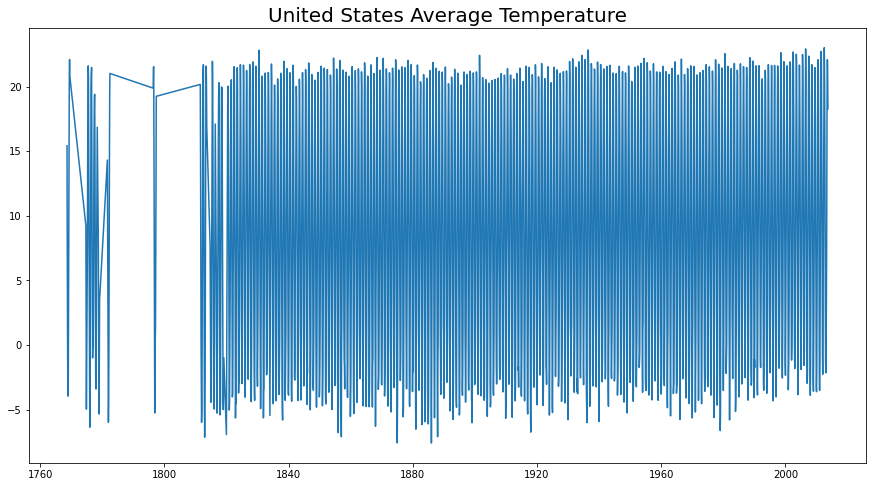

In [7]:
plt.figure(figsize=(15,8))
plt.plot(USDF['dt'], USDF['AverageTemperature'])
plt.title('United States Average Temperature', size=20)
plt.show()

# Plot The Temperature At United States in 2012

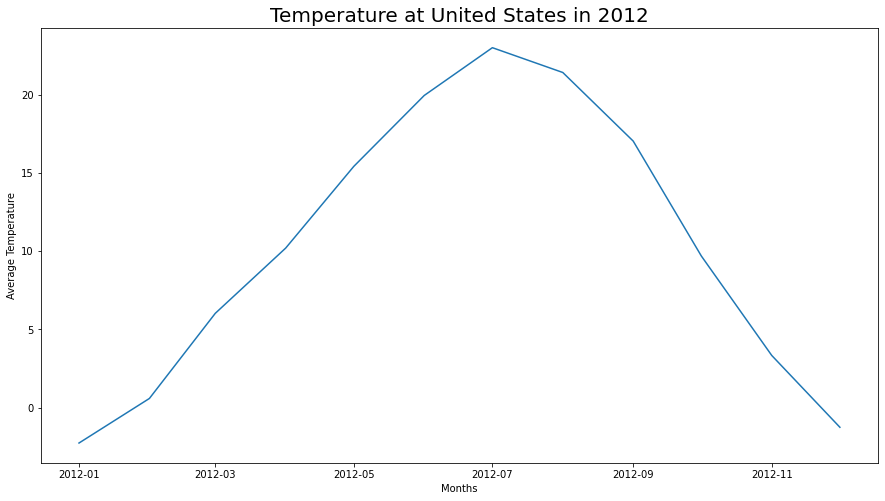

In [8]:
fig = plt.figure(figsize=(15,8))
plt.plot(USDF.loc[USDF['year']==2012, 'dt'], USDF.loc[USDF['year']==2012,'AverageTemperature'])
plt.title('Temperature at United States in 2012', size=20)
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.show()

# Find the Contry That has the Highest Temperature

In [9]:
df[df['AverageTemperature']==df['AverageTemperature'].max()]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
284851,2012-07-01,38.842,0.464,Kuwait,7,2012


# Plot The Temperature For Al Kuwait

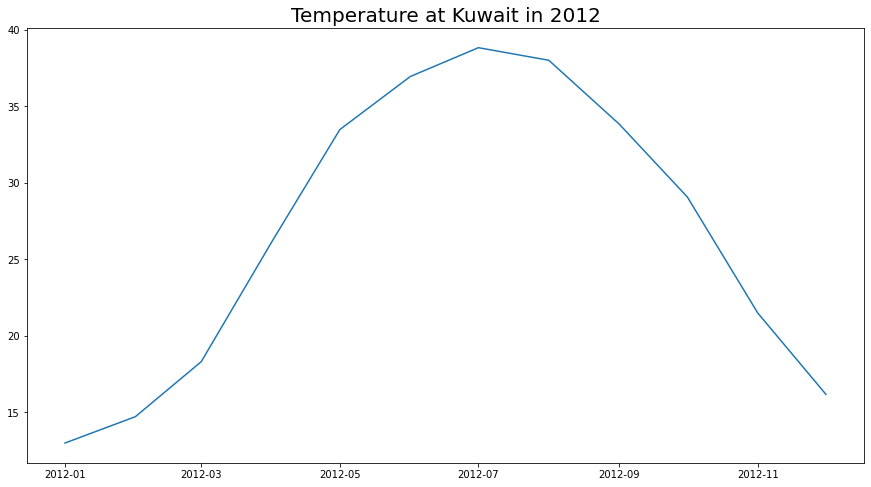

In [10]:
# Get all the rows that belongs to Al Kuwait 
KuwaitDF = df[df['Country']=='Kuwait']

# Convert to date
KuwaitDF.loc[:,'dt'] = pd.to_datetime(KuwaitDF['dt'])
KuwaitDF.loc[:,'month'] = [x.month for x in list(KuwaitDF['dt'])]
KuwaitDF.loc[:,'year'] = [x.year for x in list(KuwaitDF['dt'])]
# The plot
fig = plt.figure(figsize=(15,8))
# Getting only 2012
plt.plot(KuwaitDF.loc[KuwaitDF['year']==2012, 'dt'], KuwaitDF.loc[KuwaitDF['year']==2012,'AverageTemperature'])
plt.title('Temperature at Kuwait in 2012', size=20)
plt.show()

# Kuwait Temperature VS The Average Temperature

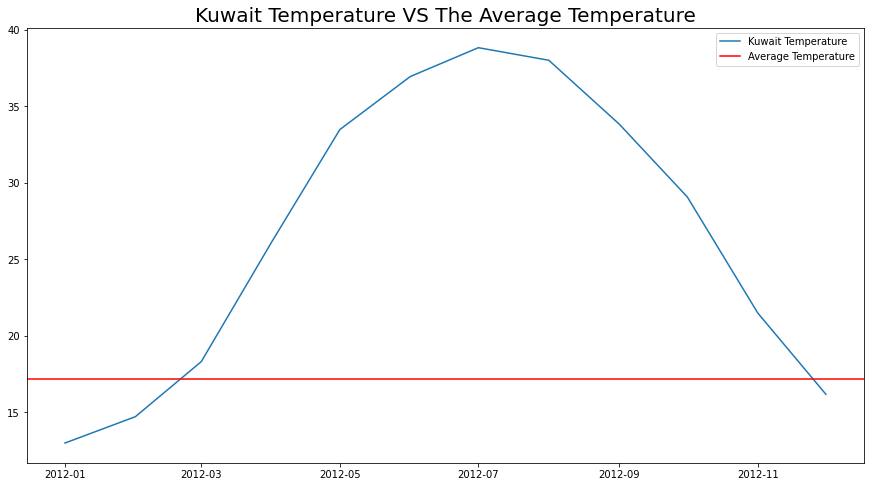

In [11]:
# Getting the mean/Avg the Temperature of all the countries
mean_temp = df['AverageTemperature'].mean()

# Plot the Kuwait VS the mean of the temperature
fig = plt.figure(figsize=(15,8))
# Plot the temperature for 2012 (Al Kwait)
plt.plot(KuwaitDF.loc[KuwaitDF['year']==2012, 'dt'], KuwaitDF.loc[KuwaitDF['year']==2012,'AverageTemperature'], label='Kuwait Temperature')
# Plot A Line for the Mean 
plt.axhline(mean_temp, color='r', label='Average Temperature')
plt.title("Kuwait Temperature VS The Average Temperature", size=20)
plt.legend()
plt.show()

# Temperature for Al Kuwait in the last 5 years Against The mean Temperature      for all the countries

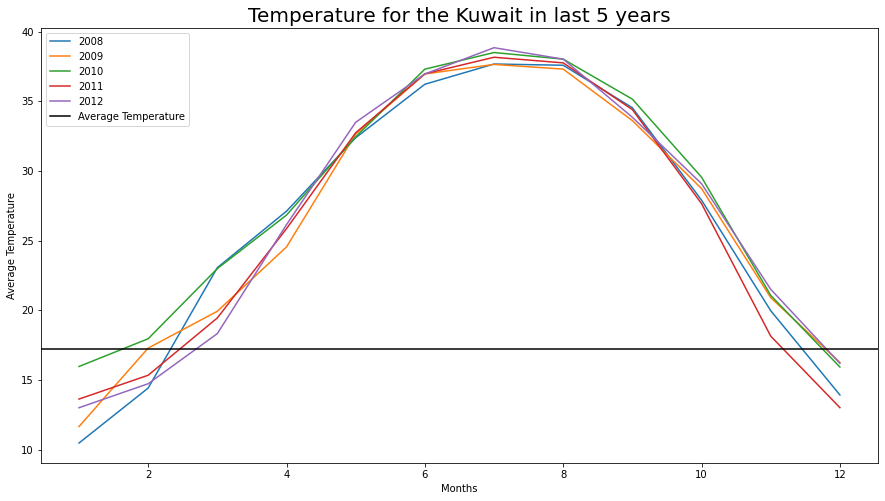

In [12]:
# Adding a figure
fig = plt.figure(figsize=(15,8))
# Choose which years To plot
years = [2008,2009,2010,2011,2012]
# plotting The temperature for all the selected years
for year in years:
    plt.plot(KuwaitDF.loc[KuwaitDF['year']==year, 'month'], KuwaitDF.loc[KuwaitDF['year']==year,'AverageTemperature'], label=year)
plt.title('Temperature for the Kuwait in last 5 years', size=20)
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.axhline(mean_temp, color='black', label='Average Temperature')
# Choose the place for the legend
plt.legend(loc='upper left')
plt.show()

# Find the top 5 countries (In July 7)

In [13]:
# Get the top countries for 7/2012
topDF = df[(df['dt'].dt.year==2012) & (df['dt'].dt.month==7)]
topDF = topDF.sort_values('AverageTemperature', ascending=False)
top_countries = list(topDF['Country'].head())
topDF.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
284851,2012-07-01,38.842,0.464,Kuwait,7,2012
548387,2012-07-01,37.713,0.784,United Arab Emirates,7,2012
424300,2012-07-01,37.603,0.772,Qatar,7,2012
47551,2012-07-01,37.471,0.554,Bahrain,7,2012
458212,2012-07-01,36.495,0.556,Saudi Arabia,7,2012


# Plot the 5 top countries

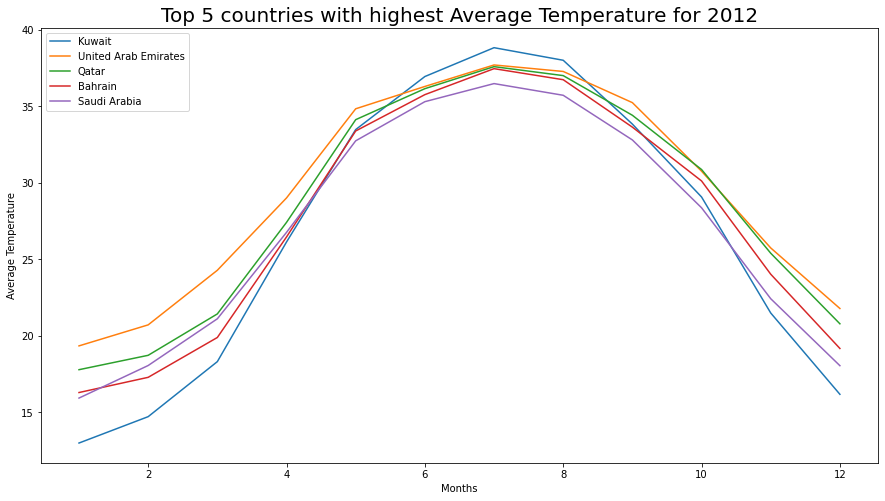

In [14]:
# Convert The date to a datetime 
topDF.loc[:,'dt'] = pd.to_datetime(topDF['dt'])
topDF['month'] = topDF['dt'].dt.month
topDF['year'] = topDF['dt'].dt.year

# Adding a figure
fig = plt.figure(figsize=(15,8))
# Plot the Selected countries
for country in top_countries:
    plt.plot(df.loc[(df['year']==2012)&(df['Country']==country), 'month'], df.loc[(df['year']==2012)&(df['Country']==country),'AverageTemperature'], label=country)
# Show the legend in the upper left corner
plt.legend(loc="upper left")
# Setting the titles for the plots
plt.title('Top 5 countries with highest Average Temperature for 2012', size=20)
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.show()

# Find the Contry That has the lowest Temperature

In [15]:
df[df['AverageTemperature'] == df['AverageTemperature'].min()]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
210436,1868-02-01,-37.658,6.111,Greenland,2,1868


# Plot The Temperature For Greenland

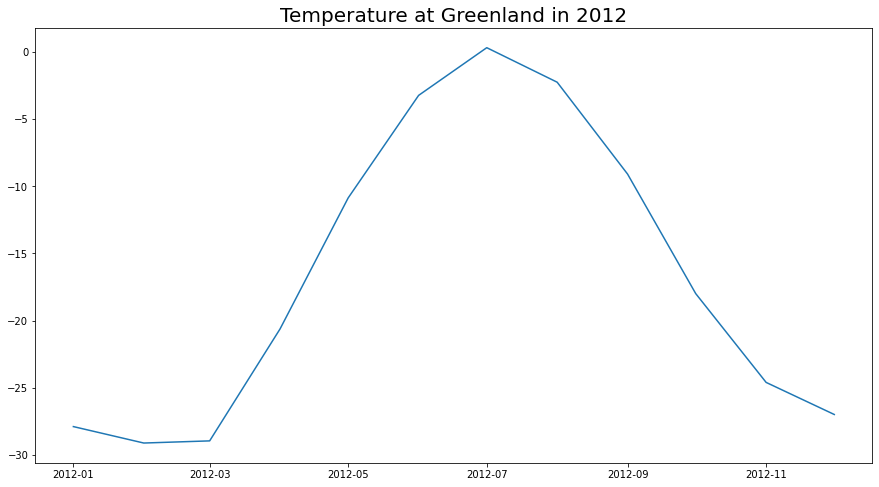

In [16]:
# Get all the rows that belongs to Greenland
GreenlandDF = df[df['Country']=='Greenland']

# Convert to date
GreenlandDF.loc[:,'dt'] = pd.to_datetime(GreenlandDF['dt'])
GreenlandDF.loc[:,'month'] = [x.month for x in list(GreenlandDF['dt'])]
GreenlandDF.loc[:,'year'] = [x.year for x in list(GreenlandDF['dt'])]
# The plot
fig = plt.figure(figsize=(15,8))
# Getting only 2012
plt.plot(GreenlandDF.loc[GreenlandDF['year']==2012, 'dt'], GreenlandDF.loc[GreenlandDF['year']==2012,'AverageTemperature'])
plt.title('Temperature at Greenland in 2012', size=20)
plt.show()

# Kuwait Temperature VS The Average Temperature

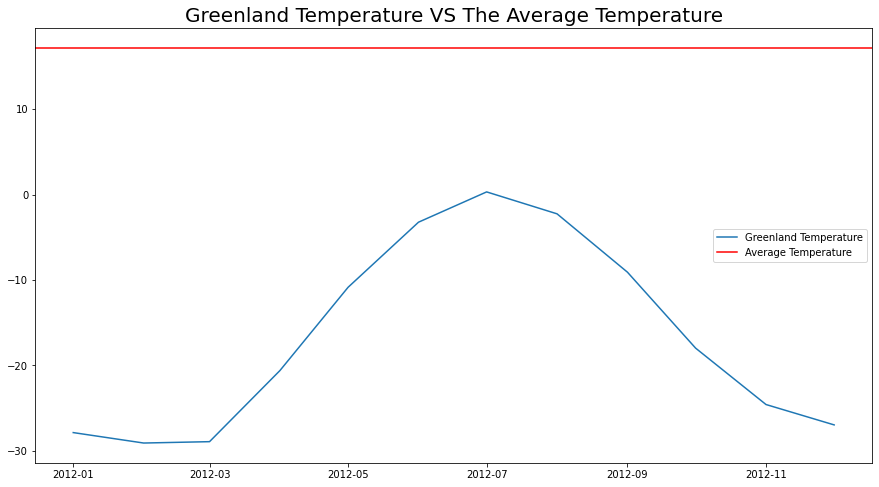

In [17]:
# Getting the mean/Avg of the Temperature of all the countries
mean_temp = df['AverageTemperature'].mean()

# Plot the Greenland VS the mean of the temperature
fig = plt.figure(figsize=(15,8))
# Plot the temperature for 2012 (Al Kwait)
plt.plot(GreenlandDF.loc[GreenlandDF['year']==2012, 'dt'], GreenlandDF.loc[GreenlandDF['year']==2012,'AverageTemperature'], label='Greenland Temperature')
# Plot A Line for the Mean 
plt.axhline(mean_temp, color='r', label='Average Temperature')
plt.title("Greenland Temperature VS The Average Temperature", size=20)
plt.legend()
plt.show()

# Temperature for Greenland in the last 5 years Against The mean Temperature for all the countries

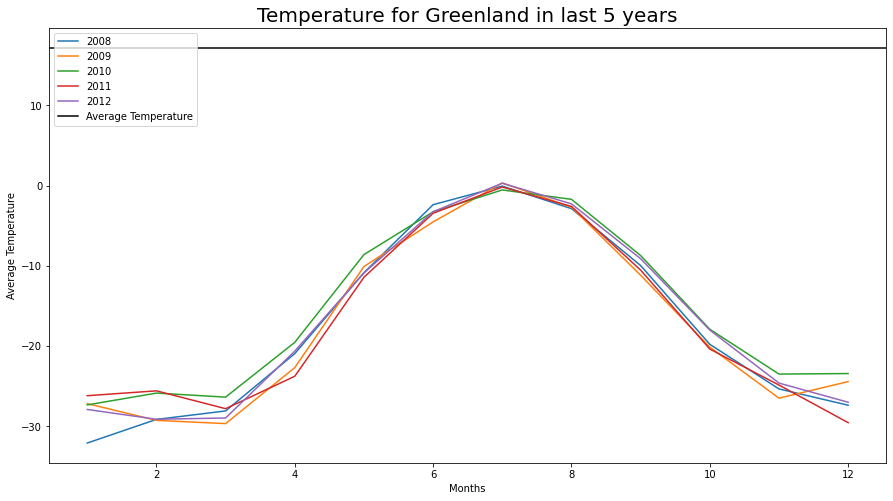

In [18]:
# Adding a figure
fig = plt.figure(figsize=(15,8))
# Choose which years To plot
years = [2008,2009,2010,2011,2012]
# plotting The temperature for all the selected years
for year in years:
    plt.plot(GreenlandDF.loc[GreenlandDF['year']==year, 'month'], GreenlandDF.loc[GreenlandDF['year']==year,'AverageTemperature'], label=year)
plt.title('Temperature for Greenland in last 5 years', size=20)
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.axhline(mean_temp, color='black', label='Average Temperature')
# Choose the place for the legend
plt.legend(loc='upper left')
plt.show()

# Find the Less 5 countries (In February 2)

In [19]:
lowDF = df[(df['dt'].dt.year==2012) & (df['dt'].dt.month==2)]
lowDF = lowDF.sort_values('AverageTemperature', ascending=True)
low_countries = list(lowDF['Country'].head())
lowDF.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
212164,2012-02-01,-29.103,0.619,Greenland,2,2012
144762,2012-02-01,-28.514,0.604,Denmark,2,2012
432676,2012-02-01,-22.502,0.220,Russia,2,2012
349359,2012-02-01,-19.689,0.256,Mongolia,2,2012
277657,2012-02-01,-17.305,0.412,Kazakhstan,2,2012


# Plot the 5 less countries

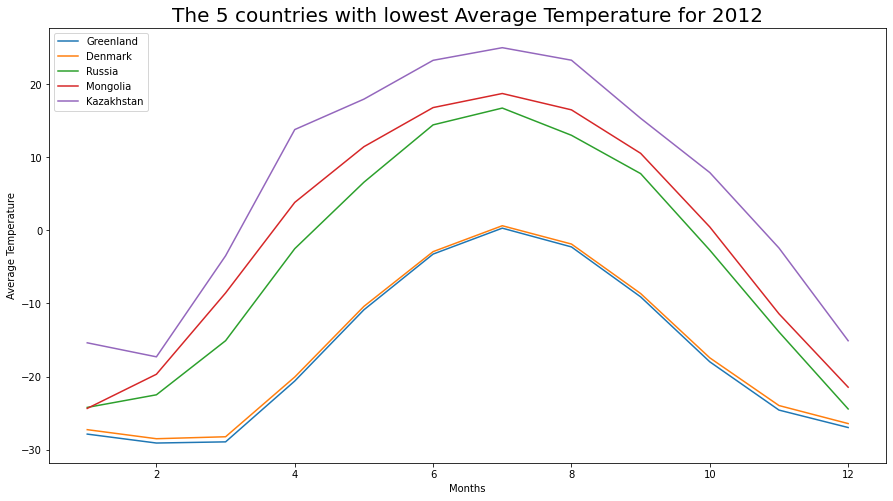

In [21]:
# Convert The date to a datetime 
lowDF.loc[:,'dt'] = pd.to_datetime(lowDF['dt'])
lowDF['month'] = lowDF['dt'].dt.month
lowDF['year'] = lowDF['dt'].dt.year

# Adding a figure
fig = plt.figure(figsize=(15,8))
# Plot the Selected countries
for country in low_countries:
    plt.plot(df.loc[(df['year']==2012)&(df['Country']==country), 'month'], df.loc[(df['year']==2012)&(df['Country']==country),'AverageTemperature'], label=country)
# Show the legend in the upper left corner
plt.legend(loc="upper left")
# Setting the titles for the plots
plt.title('The 5 countries with lowest Average Temperature for 2012', size=20)
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.show()